# Hierarchical clustering

In [3]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)
##pd.concat: 2개의 데이터를 리스트 형식으로 연결
data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


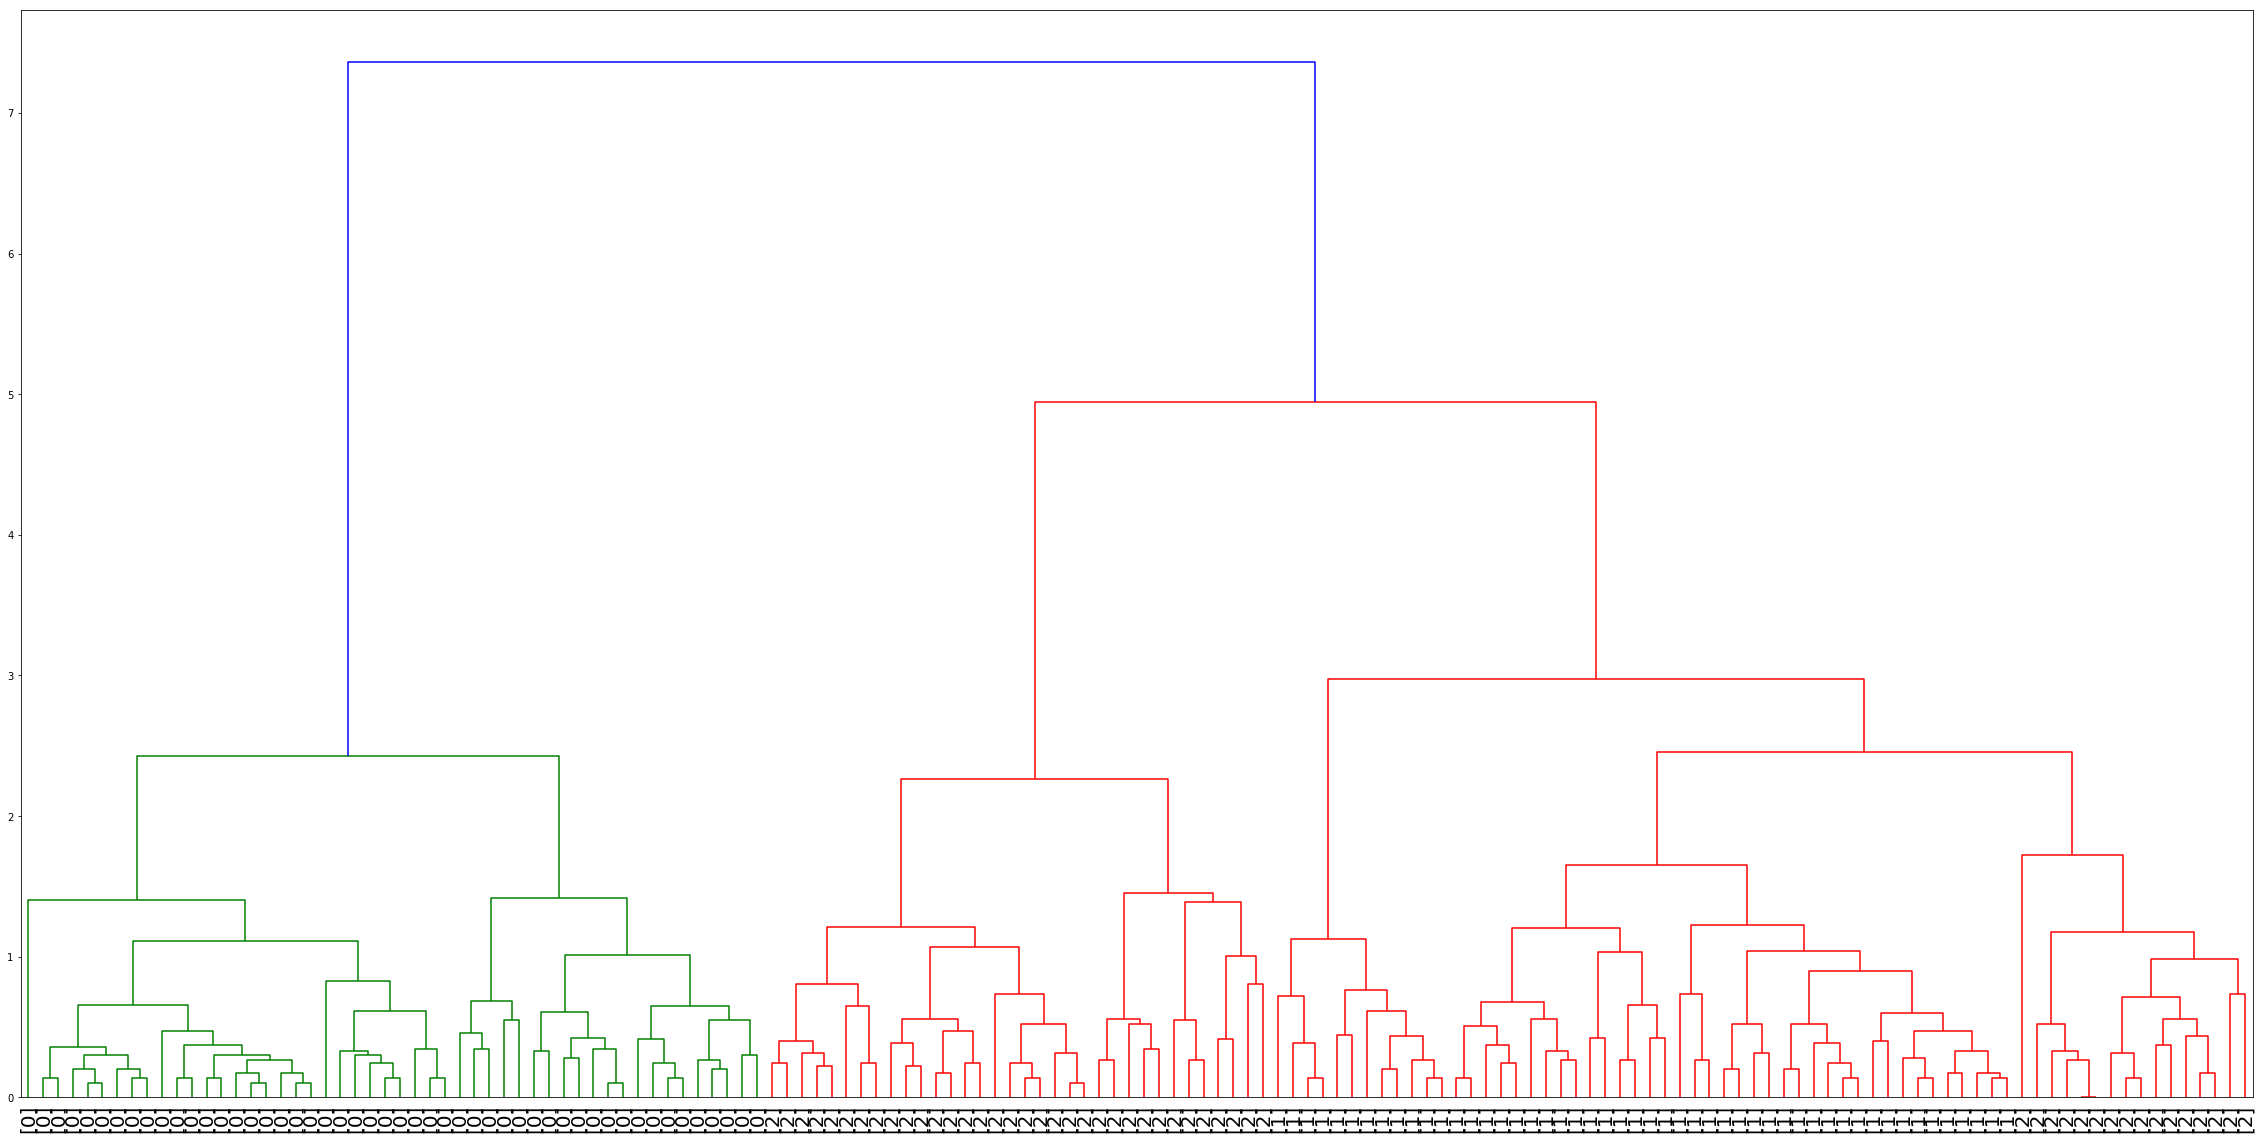

In [4]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
##계층적 클러스터링을 위한 scipy의 명령
##dendrogram은 클러스터링 결과를 tree 형태로 시각화해줌
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(data,method='complete') 
##complete 두 그룹간의 최대거리(complete linkage) 

 
# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(40,20)) 
dendrogram(mergings,
           labels = labels.as_matrix(columns=['labels']),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()

In [6]:
from scipy.cluster.hierarchy import fcluster
##fcluster 모듈은 그룹의 개수를 정해서 개수만큼 나눠줄 수 있는 모듈
predict = pd.DataFrame(fcluster(mergings,3,criterion='distance'))##merging,3이 군집개수
predict.columns=['predict']
ct = pd.crosstab(predict['predict'],labels['labels'])
##crosstab으로 교차표를 만듬
##predict는 군집분석을 통해 가진 숫자
##기존의 군집들이 가지고 있던 숫자
print(ct)
##새로형성된 라벨의 숫자는 기존 라벨의 숫자를 고려하지 않음

labels    0   1   2
predict            
1        50   0   0
2         0   0  34
3         0  50  16


# K-means clustering

In [7]:
import numpy as np # linear algebra
import seaborn as sns  #Python library for Vidualization

In [8]:
dataset = pd.read_csv('data/Mall_Customers.csv')

In [9]:
#Exploratory Data Analysis
#As this is unsupervised learning so Label (Output Column) is unknown

dataset.head(10) #Printing first 10 rows of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [10]:
#total rows and colums in the dataset
dataset.shape


(200, 5)

In [11]:
dataset.info() # there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
#Missing values computation
dataset.isnull().sum()
##결측치 확인(결측치없음)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= dataset.iloc[:, [3,4]].values
##numeric밖에 넣지 못함

In [16]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
score=[]

In [17]:
#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0) 
    ##init이 임의의첫점을 어디에 선택할지 결정함
    ##k-menas++이란?
    kmeans.fit(X)
    score.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

In [18]:
score

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049434,
 20736.679938924124]

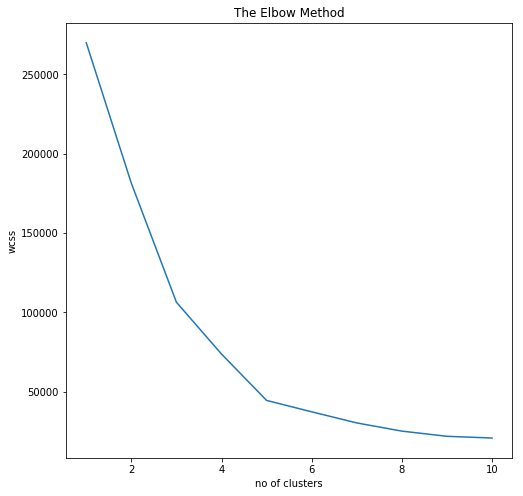

In [20]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.figure(figsize=(8, 8))
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()
##가장 많이 꺾이는 부분에서 K값을 도출

In [21]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

#Model Build
##클러스터의 개수를 5로 지정함
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

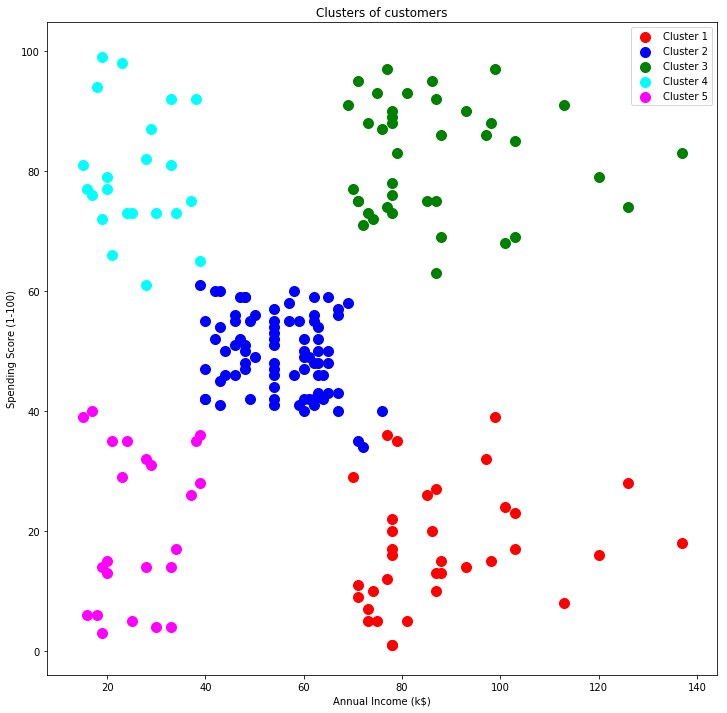

In [22]:
#Visualizing all the clusters 
plt.figure(figsize=(12, 12))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend() ##각각의 label마다 범례를 색깔별로 표시해줌
plt.show()
